# Exploration des données
Apres l'avoir extrait la base en ligne de commande, pour l'explorer, on l'ouvre avec python en mode "read". La base scihub fait 13,8 GIGA donc elle ne pourra pas etre ouvert avec Pandas.

In [1]:
import pandas as pd
import numpy as np

In [35]:
donnees = open("scihub.tab", encoding="utf-8") ##enconding par defaut est encoding='cp1252'

Visualisation des 10 premnieres lignes

In [2]:
donnees.seek(0)
for i in range(10):
    print(next(donnees).split("\t"))

['2017-01-01 00:00:00', '10.1002/chem.201601597', '1', '1', 'India', 'Kanpur', '26.449923', '80.3318736\n']
['2017-01-01 00:00:00', '10.1007/3-540-45346-6_49', '2', '2', 'Germany', 'Haina (Kloster)', '51.0275091', '8.9726614\n']
['2017-01-01 00:00:00', '10.1080/00036848200000026', '3', '3', 'Italy', 'Venezia', '45.4408474', '12.3155151\n']
['2017-01-01 00:00:00', '10.1109/indicon.2015.7443562', '4', '4', 'Italy', 'Catanzaro', '38.9097919', '16.5876516\n']
['2017-01-01 00:00:00', '10.1111/nph.14009', '5', '5', 'Argentina', 'Ciudad Evita', '-34.7175201', '-58.5356412\n']
['2017-01-01 00:00:01', '10.1049/iet-gtd.2014.1045', '6', '6', 'Iran', 'N/A', 'N/A', 'N/A\n']
['2017-01-01 00:00:02', '10.1002/ejic.201200106', '7', '7', 'Iran', 'Isfahan', '32.6546275', '51.6679826\n']
['2017-01-01 00:00:02', '10.1002/pssa.2211340103', '8', '8', 'Venezuela', 'San Cristóbal', '7.7713572', '-72.2261466\n']
['2017-01-01 00:00:02', '10.1016/S0901-5027(05)80818-5', '9', '9', 'Brazil', 'N/A', '-15.8729537', '

Determinons le nombre de champs de la base

In [40]:
donnees.seek(0)
col = next(donnees).split("\t")
nbre_col = 0
for _ in col:
    nbre_col += 1
print("Le nombre de champs est",nbre_col)

Le nombre de champs est 8


In [41]:
%%time
donnees.seek(0)
nbre_ligne = 0
for _ in donnees:
    nbre_ligne += 1
print("Le nombre de ligne est", nbre_ligne)

Le nombre de ligne est 150875862
Wall time: 5min 1s


## Decomposer la premiere variable : explorons les dates
Création d'une liste mois contenant les 12 mois de l'annee de la base. Tous les telechargements dans la base consernent l'annee 2017. Nous allons faire un graphique pour visualisation la variation des telechargement selon les mois.

Nous allons extraire les mois dans la liste date.

In [ ]:
## extraction des mois dans la liste date
mois = list(map(lambda e : e.split("\t")[0].split("-")[1], donnees)) ##extraire les mois

In [4]:
mois[0:1500000000:10000000]

['01',
 '02',
 '03',
 '03',
 '04',
 '05',
 '06',
 '07',
 '07',
 '08',
 '08',
 '09',
 '09',
 '11',
 '11',
 '12']

In [5]:
len(mois)

150875862

Pour faire le graphique, nous allons creer un dictionnaire ou stocker les mois et leurs occurences

In [6]:
dicmois = {}
for i in range(150875852) :
    p = mois[i]
    dicmois[p] = dicmois.get(p , 0) + 1
dicmois

{'01': 9257598,
 '02': 9854264,
 '03': 12990139,
 '04': 8911780,
 '05': 13959687,
 '06': 14123204,
 '07': 18410282,
 '08': 17418110,
 '09': 15235240,
 '10': 4071933,
 '11': 15878921,
 '12': 10764694}

Nous allons stocker le dictionnaire dans un dataframe et faire le graphique depuis le dataframe.
La commande dataframe.from_dict va nous permettre de creer le dataframe directement avec le dictionnaire. 

In [15]:
dmois = pd.DataFrame.from_dict(dicmois, orient = 'index', columns=["Counts"])
dmois["freq"]=(dmois["Counts"]/sum(dmois["Counts"]))*100
dmois

,Counts,freq
01,9257598,6.135904
02,9854264,6.531373
03,12990139,8.609820
04,8911780,5.906697
05,13959687,9.252433
06,14123204,9.360811
07,18410282,12.202272
08,17418110,11.544664
09,15235240,10.097865
10,4071933,2.698863


Tracons une courbe des telechargement en fonction des mois

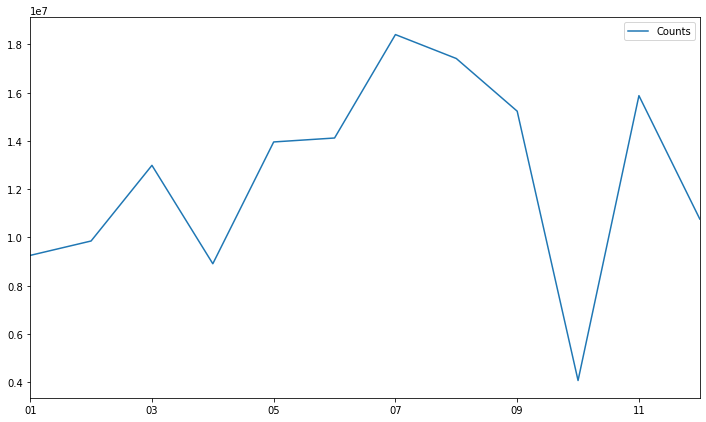

In [15]:
dmois.plot(figsize=(12,7))

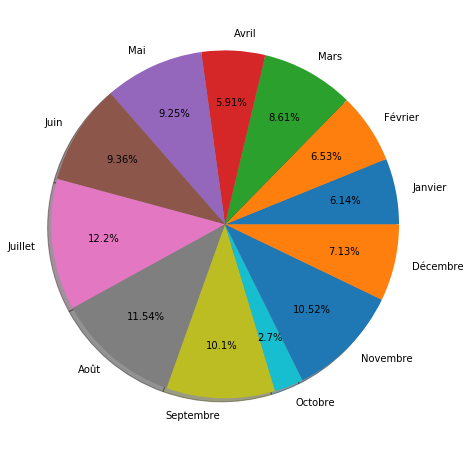

In [36]:
plt.figure(figsize = (8, 8))
plt.pie(dmois["freq"], labels = ["Janvier" ,"Février" ,"Mars" ,"Avril" ,"Mai" ,"Juin" ,"Juillet" ,"Août" ,"Septembre",
        "Octobre" ,"Novembre" ,"Décembre"],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = .7, labeldistance = 1.1,
           shadow = True)
plt.show()

La courbe nous montre que le mois de Juillet est le mois ou on a le plus de telechargement sur le site et le mois d'Octobre ou on a le moins de telechargement.

In [23]:
int(dmois.mean())

12572987

La moyenne des telechargements par mois est de 12572987.

# Les telechargement les plus frequents en fonctions des sites

In [5]:
%%time
donnees.seek(0)
site = {}
for s in donnees :
    site0 = s.split("\t")[1]
    site[site0] = site.get(site0 , 0) + 1

Wall time: 5min 28s


Nous avons stocke dans un dictionnaire les sites et leur occurences. Nous allons conserver les sites qui ont comptabilise plus de 1000 telechargements.

In [6]:
site1 = site
cle=list(site.keys())
for _ in cle :
    if site1[_] < 1000 :
        del site1[_]
site1

{'10.1038/nature16961': 1498,
 '10.1056/NEJM200005253422107': 1343,
 '10.1038/nbt.2842': 2601,
 '10.1038/nature14236': 1299,
 '10.1007/BF01096442': 4731,
 '10.1056/NEJMra1413919': 1060,
 '10.1056/NEJMra1200894': 1037,
 '10.1056/NEJMra1309483': 1372,
 '10.1056/NEJMra1601561': 1155,
 '10.1056/NEJMra1114525': 1288,
 '10.1016/0304-405X(76)90026-X': 1408,
 '10.1056/NEJMra1402225': 1108,
 '10.1145/2858036.2858341': 1476,
 '10.1111/j.1532-5415.1991.tb01616.x': 1035,
 '10.1103/RevModPhys.81.109': 1059,
 '10.1016/s0140-6736(16)30173-8': 1204,
 '10.1080/15548627.2015.1100356': 2123,
 '10.1017/CBO9781107415324.004': 3793,
 '10.1056/NEJMcp1511175': 1585,
 '10.1056/NEJMra1100359': 1383,
 '10.1016/S0140-6736(16)32411-4': 1031,
 '10.1038/nmat4014': 1417,
 '10.1038/nature06016': 1380,
 '10.1016/0022-1759(83)90303-4': 2061,
 '10.1056/NEJMra0904569': 1012,
 '10.1038/nrc.2016.97': 1116,
 '10.1038/nature20101': 1167,
 '10.1007/s00401-016-1545-1': 1555,
 '10.1002/14651858': 6651,
 '10.1096/fj.1530-6860': 2

Nous allons importer ces donnees dans un dataframe et faire le tri.

In [8]:
nlien = []
nombre = []
for l,g in site1.items():
    nlien.append(l)
    nombre.append(g)

In [53]:
table = np.array(list(zip(nlien,nombre)))
lien = pd.DataFrame(table, columns=['lien','nombre'])
lien['nombre'] = lien['nombre'].apply(lambda e:int(e))
lien.head(4)

,lien,nombre
0,10.1038/nature16961,1498
1,10.1056/NEJM200005253422107,1343
2,10.1038/nbt.2842,2601
3,10.1038/nature14236,1299


In [54]:
lien.sort_values(by='nombre', ascending=False).head(5)

,lien,nombre
148,10.1080/01419870.2016.1199889,64145
247,10.1061/(ASCE)GM.1943-5622.0000048,12029
157,10.1016/0032-3861(78)90123-4,12013
277,10.1021/jp809992g,8339
152,10.1145/954587.954588,7649


Le lien de telechargement le plus utilise est le "10.1080/01419870.2016.1199889". Ce lien renvoie a un article qui explore la nouvelle communauté musulmane chinoise d'outre-mer en Malaisie.

# Liste des pays existant dans la base

Occurences des pays

In [59]:
donnees.seek(0)
pays = {}
for x in donnees :
    p = x.split("\t")[4]
    pays[p] = pays.get(p , 0) + 1
pays

{'India': 13143462,
 'Germany': 2881769,
 'Italy': 2677048,
 'Argentina': 1514502,
 'Iran': 6619989,
 'Venezuela': 376839,
 'Brazil': 7004792,
 'Canada': 2808743,
 'Greece': 1106803,
 'N/A': 3217162,
 'Mexico': 3271085,
 'United Kingdom': 3150705,
 'Libya': 23808,
 'South Korea': 3063053,
 'Spain': 3089349,
 'Jordan': 208837,
 'Algeria': 1188527,
 'France': 4208280,
 'United States': 11991045,
 'Philippines': 1220502,
 'Lithuania': 225023,
 'Austria': 508226,
 'Costa Rica': 194576,
 'Uganda': 54981,
 'Bulgaria': 244703,
 'Egypt': 1347550,
 'Turkey': 2004756,
 'Israel': 256544,
 'Belarus': 194338,
 'Slovenia': 222746,
 'Pakistan': 1935856,
 'Netherlands': 2194240,
 'Poland': 1110027,
 'United Arab Emirates': 124579,
 'Saudi Arabia': 269404,
 'Belgium': 763395,
 'Panama': 62165,
 'China': 24938665,
 'Iraq': 395844,
 'Morocco': 967114,
 'Chile': 1653435,
 'Bangladesh': 362224,
 'Portugal': 1712920,
 'Singapore': 1389882,
 'Iceland': 62615,
 'Nigeria': 375038,
 'Ecuador': 609783,
 'Bolivia

In [62]:
dpays = pd.DataFrame.from_dict(pays, orient = 'index', columns=["nombre"])
dpays.sort_values(by='nombre', ascending=False).head(5)

,nombre
China,24938665
India,13143462
United States,11991045
Brazil,7004792
Iran,6619989


Les 5 pays qui affectuent le plus de telechargement sur sci-hub sont la Chine, l'Inde, les USA, le Brazil et l'Iran.

Creons un tableau de frequence de telechargement des pays.

In [70]:
dpays["frequence"] = (dpays["nombre"]/sum(dpays["nombre"]))*100
dpays.sort_values(by='frequence', ascending=False).head(5)

,nombre,frequence
China,24938665,16.529261
India,13143462,8.711441
United States,11991045,7.947623
Brazil,7004792,4.642752
Iran,6619989,4.387706


In [ ]:
Donc seulement la Chine a effectue plus de 16% des telechargements.

# Longitude - Latitude

Je voulais creer deux listes contenant l'une la latitude et l'autre la longitude mais j'ai eu un probleme de memoire RAM. Alors, dans un fichier excel.csv, j'ai copie les lalitute et la longitude pour stcoker les donnees dans un dataFrame.

In [7]:
donnees.seek(0)
f = open ("coor.csv", "w")
for i in donnees :                # la fonction join est aussi
    f.write(i.split("\t")[6] + ";" + i.strip().split("\t")[-1] + "\n")    # pour assembler les chaînes                       # un une seule et réduire le
f.close () 

In [2]:
coordonnee = pd.read_csv("coor.csv", sep=";", header=None)
coordonnee.head(5)

,0,1
0,26.449923,80.331874
1,51.027509,8.972661
2,45.440847,12.315515
3,38.909792,16.587652
4,-34.717520,-58.535641


In [3]:
coordonnee.columns=["latitude", "longitude"]
coordonnee.head(5)

,latitude,longitude
0,26.449923,80.331874
1,51.027509,8.972661
2,45.440847,12.315515
3,38.909792,16.587652
4,-34.717520,-58.535641


Nous allons supprimer les valeurs manquantes des cordonnees

In [13]:
newcoor = coordonnee.dropna().reset_index(drop=True)

In [ ]:
Nous allons utiliser la bibliotheque geapandas pour representer les donnees sur une carte.

In [ ]:
import geopandas
geo = geopandas.GeoDataFrame(
    newcoor, geometry=geopandas.points_from_xy(newcoor.longitude, newcoor.latitude))

Nous avons des soucis pour excecuter la fonction geopandas avec la gros base. Alors, je vais importer la petite base (short) et representer sur une carte du monde en fonction des latitudes et des longitutdes les telechargements. Dans ce qui va suivre, nous allons reprendre la meme code que pour la grosse base et faire la representation.

In [1]:
short = open("scihub.shorter.tab", encoding="utf-8") ##enconding par defaut est encoding='cp1252'

In [3]:
short.seek(0)
for i in range(5):
    print(next(short).split("\t"))

['2017-01-01 00:00:00', '10.1002/chem.201601597', '1', '1', 'India', 'Kanpur', '26.449923', '80.3318736\n']
['2017-01-01 00:00:01', '10.1049/iet-gtd.2014.1045', '6', '6', 'Iran', 'N/A', 'N/A', 'N/A\n']
['2017-01-01 00:00:03', '10.1037/a0012711', '11', '11', 'Greece', 'Athina', '37.9838096', '23.7275388\n']
['2017-01-01 00:00:08', '10.1016/0010-2180(93)90050-d', '16', '16', 'Germany', 'Haina (Kloster)', '51.0275091', '8.9726614\n']
['2017-01-01 00:00:10', '10.1007/978-3-319-27559-8_6', '22', '22', 'Germany', 'Frankfurt am Main', '50.1109221', '8.6821267\n']


In [5]:
short.seek(0)
f = open ("short1.csv", "w")
for i in short :                # la fonction join est aussi
    f.write(i.split("\t")[6] + ";" + i.strip().split("\t")[-1] + "\n")    # pour assembler les chaînes                       # un une seule et réduire le
f.close () 

In [8]:
shortcoor = pd.read_csv("short1.csv", sep=";", header=None)
shortcoor.columns=["latitude", "longitude"]
shortcoor.head(5)

,latitude,longitude
0,26.449923,80.331874
1,NaN,NaN
2,37.983810,23.727539
3,51.027509,8.972661
4,50.110922,8.682127


In [9]:
shortcoor0 = shortcoor.dropna().reset_index(drop=True)

In [10]:
import geopandas
shortgeo = geopandas.GeoDataFrame(
    shortcoor0, geometry=geopandas.points_from_xy(shortcoor0.longitude, shortcoor0.latitude))

In [11]:
shortgeo.head(5)

,latitude,longitude,geometry
0,26.449923,80.331874,POINT (80.33187 26.44992)
1,37.983810,23.727539,POINT (23.72754 37.98381)
2,51.027509,8.972661,POINT (8.97266 51.02751)
3,50.110922,8.682127,POINT (8.68213 50.11092)
4,41.499320,-81.694361,POINT (-81.69436 41.49932)


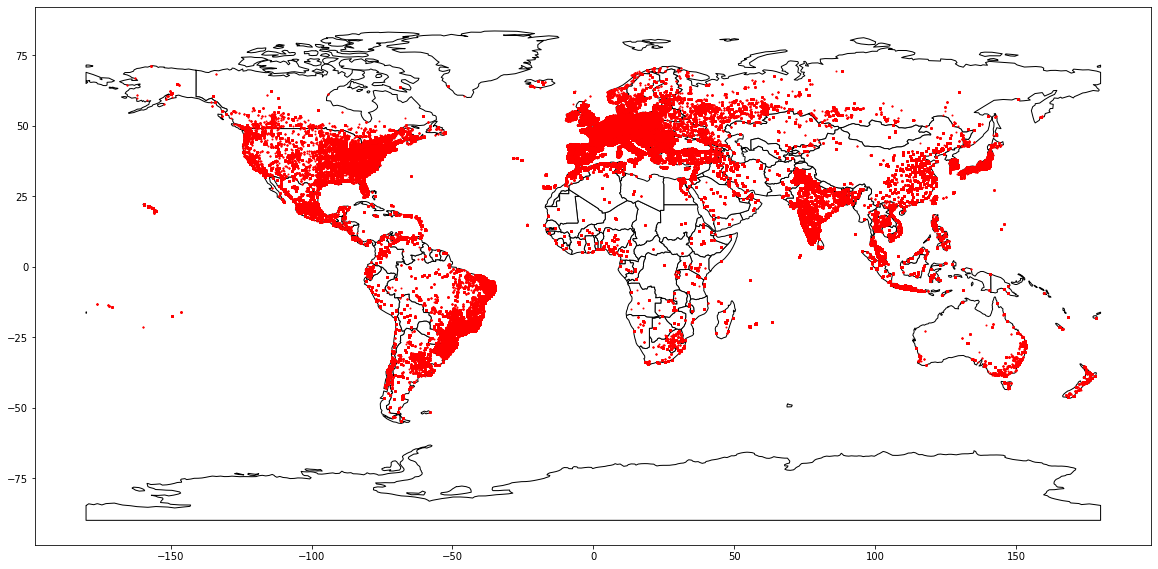

In [33]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(20, 30))
shortgeo.plot(ax=ax, color='red', markersize=1)


In [ ]:
shortgeo.to_csv('shortgeo.csv', index=False, header=False, sep=';')

In [18]:
dd = shortgeo.iloc[1:100]
dd.head(4)

,latitude,longitude,geometry
1,37.983810,23.727539,POINT (23.72754 37.98381)
2,51.027509,8.972661,POINT (8.97266 51.02751)
3,50.110922,8.682127,POINT (8.68213 50.11092)
4,41.499320,-81.694361,POINT (-81.69436 41.49932)


In [12]:
df_all = dd.dropna().reset_index(drop=True)
df_all

,latitude,longitude
0,51.027509,8.972661
1,45.440847,12.315515
2,38.909792,16.587652
3,-34.717520,-58.535641
4,32.654628,51.667983
5,7.771357,-72.226147
6,-15.872954,-48.016395
7,43.653226,-79.383184
8,37.983810,23.727539
9,37.268218,49.589123


In [5]:
import geopandas

In [11]:
geo = geopandas.GeoDataFrame(
    dd, geometry=geopandas.points_from_xy(d.longitude, d.latitude))


In [13]:
geo.head(5)

,latitude,longitude,geometry
1,51.027509,8.972661,POINT (8.97266 51.02751)
2,45.440847,12.315515,POINT (12.31552 45.44085)
3,38.909792,16.587652,POINT (16.58765 38.90979)
4,-34.717520,-58.535641,POINT (-58.53564 -34.71752)
6,32.654628,51.667983,POINT (51.66798 32.65463)


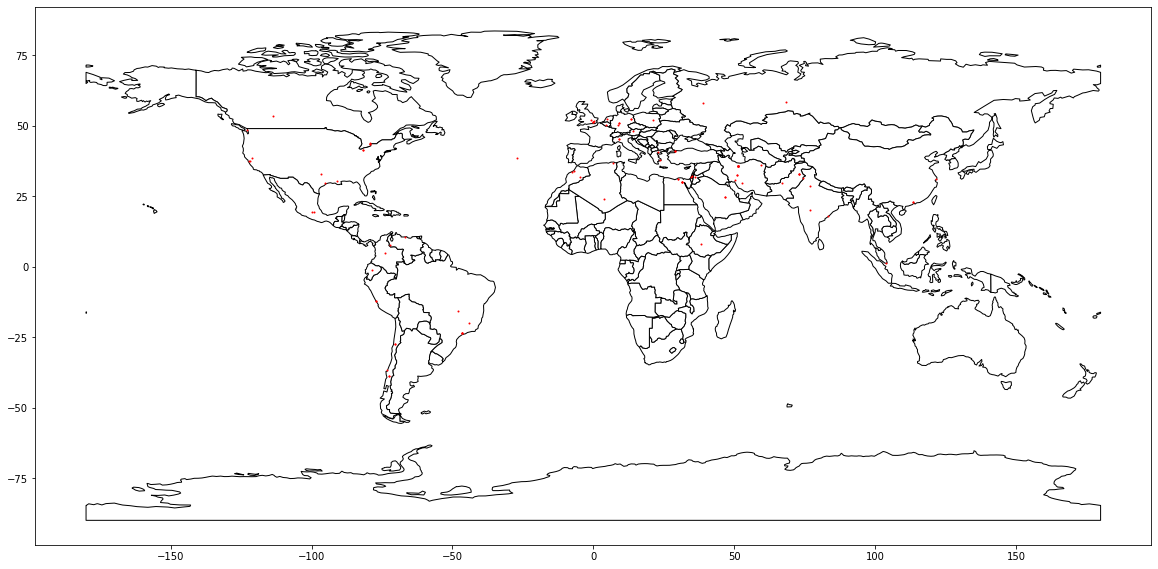

In [32]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(color='white', edgecolor='black', figsize=(20, 30))

# We can now plot our ``GeoDataFrame``.
dd.plot(ax=ax, color='red', markersize=1 )